In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import genfromtxt
from diff_tvr import *

In [4]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

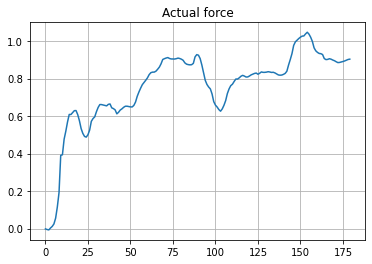

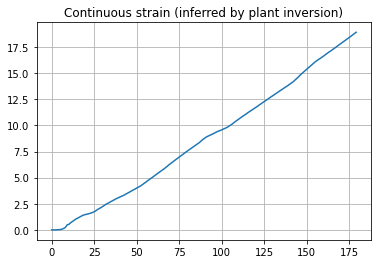

In [3]:
force = genfromtxt('./data/student_1_force_1.csv', delimiter=',')
strain = genfromtxt('./data/student_1_strain_1.csv', delimiter=',')

plt.plot(force); plt.grid(); plt.title('Actual force'); plt.show()
plt.plot(strain); plt.grid(); plt.title('Continuous strain (inferred by plant inversion)'); plt.show()

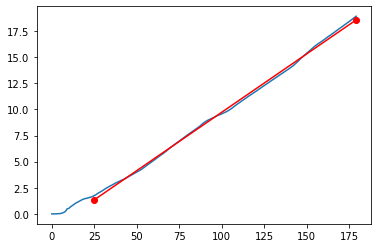

In [7]:
x = np.arange(0,180)
y = strain

px, py = segments_fit(x[25:], y[25:], 1)
slope = np.diff(py)/np.diff(px)

plt.plot(x, y)
plt.plot(px, py, '-or');

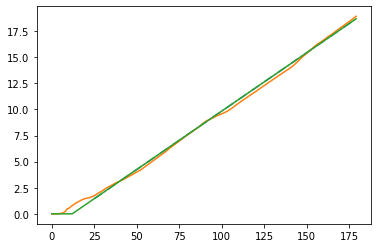

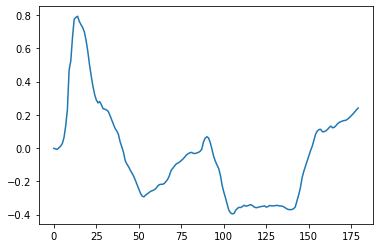

In [43]:
x_lin = np.arange(px[0],px[1])
y_lin = (np.diff(py)/np.diff(px))*x_lin - py[0]
plt.plot(np.arange(px[0],179),y_lin,'-.')
plt.plot(strain)

strain_ref = np.arange(0,180)*np.diff(py)/np.diff(px) - py[0]
strain_ref[np.where(strain_ref < 0)[0]] = 0
plt.plot(strain_ref)
plt.show()

res = strain - strain_ref 
plt.plot(res)

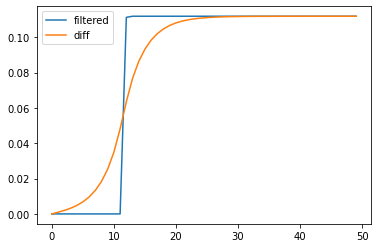

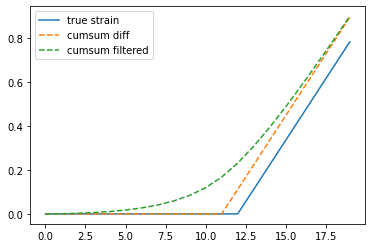

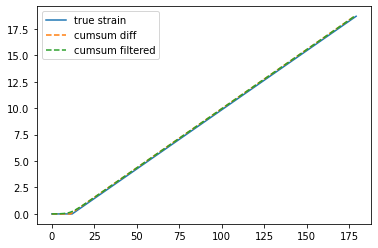

In [140]:
# Data
dt = 0.0333

dstrain = np.diff(strain_ref)

b, a = signal.butter(1, 0.1)
dstrain_f = signal.filtfilt(b, a, dstrain_findiff, padlen=20)

# Plot TVR derivative
fig2 = plt.figure()
plt.plot(dstrain[:50],label='filtered')
plt.plot(dstrain_f[:50],label='diff')
plt.legend()
plt.show()

integrated_diff = np.cumsum(dstrain)
integrated_difff = np.cumsum(dstrain_f)

plt.plot(strain_ref[:20],label='true strain')
plt.plot(integrated_diff[:20],'--',label='cumsum diff')
plt.plot(integrated_difff[:20],'--',label='cumsum filtered')
plt.legend()
plt.show()

plt.plot(strain_ref,label='true strain')
plt.plot(integrated_diff,'--',label='cumsum diff')
plt.plot(integrated_difff,'--',label='cumsum filtered')
plt.legend()
plt.show()

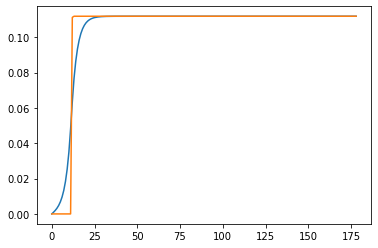

In [142]:
plt.plot(dstrain_f)
plt.plot(dstrain)

In [144]:
integrated_difff

array([8.13151629e-19, 9.33483785e-04, 2.89652966e-03, 6.09118303e-03,
       1.08462518e-02, 1.76511489e-02, 2.72062646e-02, 4.04950538e-02,
       5.88852578e-02, 8.42696784e-02, 1.19260993e-01, 1.67460663e-01,
       2.30965552e-01, 3.07703418e-01, 3.94067421e-01, 4.87425222e-01,
       5.85864316e-01, 6.87995184e-01, 7.92808283e-01, 8.99570138e-01,
       1.00774785e+00, 1.11695423e+00, 1.22690800e+00, 1.33740476e+00,
       1.44829604e+00, 1.55947395e+00, 1.67086011e+00, 1.78239758e+00,
       1.89404497e+00, 2.00577223e+00, 2.11755751e+00, 2.22938495e+00,
       2.34124303e+00, 2.45312336e+00, 2.56501985e+00, 2.67692810e+00,
       2.78884488e+00, 2.90076786e+00, 3.01269534e+00, 3.12462610e+00,
       3.23655923e+00, 3.34849410e+00, 3.46043022e+00, 3.57236725e+00,
       3.68430494e+00, 3.79624312e+00, 3.90818164e+00, 4.02012042e+00,
       4.13205939e+00, 4.24399849e+00, 4.35593768e+00, 4.46787695e+00,
       4.57981627e+00, 4.69175562e+00, 4.80369501e+00, 4.91563441e+00,
      

In [143]:
dstrain_f

array([8.13151629e-19, 9.33483785e-04, 1.96304587e-03, 3.19465337e-03,
       4.75506881e-03, 6.80489709e-03, 9.55511564e-03, 1.32887892e-02,
       1.83902041e-02, 2.53844205e-02, 3.49913145e-02, 4.81996702e-02,
       6.35048893e-02, 7.67378655e-02, 8.63640031e-02, 9.33578014e-02,
       9.84390934e-02, 1.02130868e-01, 1.04813099e-01, 1.06761855e-01,
       1.08177708e-01, 1.09206386e-01, 1.09953764e-01, 1.10496766e-01,
       1.10891280e-01, 1.11177911e-01, 1.11386161e-01, 1.11537463e-01,
       1.11647391e-01, 1.11727258e-01, 1.11785285e-01, 1.11827444e-01,
       1.11858074e-01, 1.11880328e-01, 1.11896497e-01, 1.11908244e-01,
       1.11916779e-01, 1.11922980e-01, 1.11927485e-01, 1.11930758e-01,
       1.11933136e-01, 1.11934864e-01, 1.11936119e-01, 1.11937032e-01,
       1.11937694e-01, 1.11938176e-01, 1.11938525e-01, 1.11938780e-01,
       1.11938964e-01, 1.11939098e-01, 1.11939196e-01, 1.11939267e-01,
       1.11939318e-01, 1.11939355e-01, 1.11939383e-01, 1.11939402e-01,
      

### Differentiate residualts

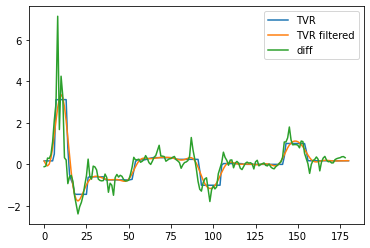

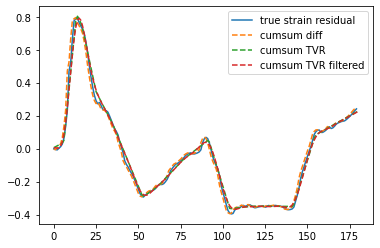

In [46]:
# Data
dt = 0.0333
dx = dt
data_noisy = res
n = len(data_noisy)

# Derivative with TVR
diff_tvr = DiffTVR(n,dx)
(dres,_) = diff_tvr.get_deriv_tvr(
    data=data_noisy, 
    deriv_guess=np.full(n+1,0.0), 
    alpha=0.01,
    no_opt_steps=100
    )

b, a = signal.ellip(4, 0.01, 120, 0.125)  # LPF
dresf = signal.filtfilt(b, a, dres, padlen=10)

# Plot TVR derivative
fig2 = plt.figure()
plt.plot(dres,label='TVR')
plt.plot(dresf,label='TVR filtered')
plt.plot(np.diff(res)/dt,label='diff')
plt.legend()
plt.show()

integrated_diff = np.cumsum(np.diff(res))
integrated_tvr = np.cumsum(dres*dt)
integrated_tvrf = np.cumsum(dresf*dt)

plt.plot(res,label='true strain residual')
plt.plot(integrated_diff,'--',label='cumsum diff')
plt.plot(integrated_tvr,'--',label='cumsum TVR')
plt.plot(integrated_tvrf,'--',label='cumsum TVR filtered')
plt.legend()
plt.show()

### Estimate second derivative of residuals

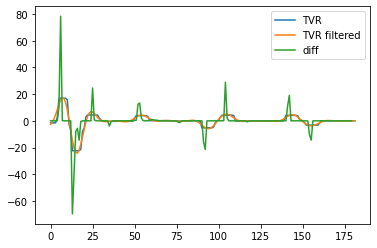

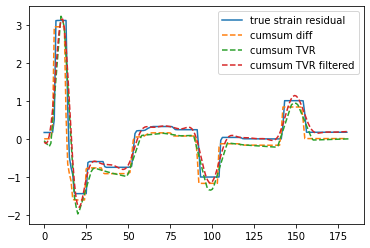

In [48]:
# Data
dx = dt
data_noisy = dresf
n = len(data_noisy)

# Derivative with TVR
diff_tvr = DiffTVR(n,dx)
(ddres,_) = diff_tvr.get_deriv_tvr(
    data=data_noisy, 
    deriv_guess=np.full(n+1,0.0), 
    alpha=0.01,
    no_opt_steps=100
    )

b, a = signal.ellip(4, 0.01, 120, 0.125)  # LPF
ddresf = signal.filtfilt(b, a, ddres, padlen=10)

# Plot TVR derivative
fig2 = plt.figure()
plt.plot(ddres,label='TVR')
plt.plot(ddresf,label='TVR filtered')
plt.plot(np.diff(dres)/dt,label='diff')
plt.legend()
plt.show()

integrated_diff = np.cumsum(np.diff(dres))
integrated_tvr = np.cumsum(ddres*dt)
integrated_tvrf = np.cumsum(ddresf*dt)

plt.plot(dres,label='true strain residual')
plt.plot(integrated_diff,'--',label='cumsum diff')
plt.plot(integrated_tvr,'--',label='cumsum TVR')
plt.plot(integrated_tvrf,'--',label='cumsum TVR filtered')
plt.legend()
plt.show()

In [49]:
ddres

array([ -1.52930865,  -1.52930396,  -1.5292846 ,  -1.52922839,
         2.62729777,  16.93112677,  16.93266055,  16.93268242,
        16.93267911,  16.93264539,  15.76152279,  -2.52193359,
        -6.96797181, -22.41305266, -22.41476882, -22.41478868,
       -22.41478383, -22.41474789, -21.27381373,  -7.86309839,
        -5.62742138,   2.82418524,   4.39765872,   4.39771305,
         4.39773204,   4.39773209,   4.39771388,   4.39766578,
         4.31502514,   2.0750279 ,   0.6155468 ,  -0.37670886,
        -0.40165386,  -0.40171344,  -0.40174204,  -0.40175379,
        -0.40175246,  -0.40173761,  -0.40170373,  -0.40159139,
        -0.31194809,  -0.31172425,  -0.31166057,  -0.31162004,
        -0.31158836,  -0.31155824,  -0.31152333,  -0.31147527,
        -0.31139038,  -0.22483886,   2.19270638,   3.91003304,
         3.9102091 ,   3.91023983,   3.91024944,   3.91024273,
         3.91021639,   3.91015008,   2.89315929,   0.17625073,
         0.12980845,   0.1297426 ,   0.12970278,   0.12

In [50]:
strain_ref

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.11130732,  0.22324677,
        0.33518623,  0.44712568,  0.55906513,  0.67100459,  0.78294404,
        0.8948835 ,  1.00682295,  1.11876241,  1.23070186,  1.34264132,
        1.45458077,  1.56652023,  1.67845968,  1.79039914,  1.90233859,
        2.01427805,  2.1262175 ,  2.23815696,  2.35009641,  2.46203587,
        2.57397532,  2.68591478,  2.79785423,  2.90979368,  3.02173314,
        3.13367259,  3.24561205,  3.3575515 ,  3.46949096,  3.58143041,
        3.69336987,  3.80530932,  3.91724878,  4.02918823,  4.14112769,
        4.25306714,  4.3650066 ,  4.47694605,  4.58888551,  4.70082496,
        4.81276442,  4.92470387,  5.03664333,  5.14858278,  5.26052223,
        5.37246169,  5.48440114,  5.5963406 ,  5.70828005,  5.82021951,
        5.93215896,  6.04409842,  6.15603787,  6.26797733,  6.37

### Differentiate actual strain

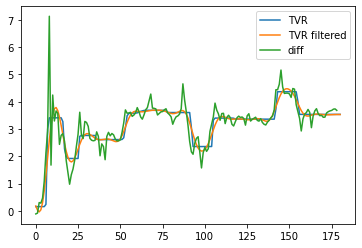

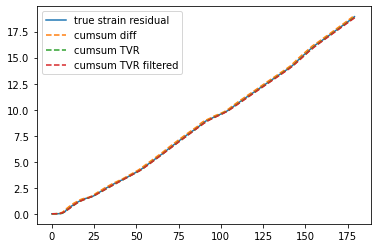

In [54]:
# Data
dt = 0.0333
dx = dt
data_noisy = strain
n = len(data_noisy)

# Derivative with TVR
diff_tvr = DiffTVR(n,dx)
(dstrain,_) = diff_tvr.get_deriv_tvr(
    data=data_noisy, 
    deriv_guess=np.full(n+1,0.0), 
    alpha=0.01,
    no_opt_steps=100
    )

b, a = signal.ellip(4, 0.01, 120, 0.125)  # LPF
dstrainf = signal.filtfilt(b, a, dstrain, padlen=10)

# Plot TVR derivative
fig2 = plt.figure()
plt.plot(dstrain,label='TVR')
plt.plot(dstrainf,label='TVR filtered')
plt.plot(np.diff(strain)/dt,label='diff')
plt.legend()
plt.show()

integrated_diff = np.cumsum(np.diff(strain))
integrated_tvr = np.cumsum(dstrain*dt)
integrated_tvrf = np.cumsum(dstrainf*dt)

plt.plot(strain,label='true strain residual')
plt.plot(integrated_diff,'--',label='cumsum diff')
plt.plot(integrated_tvr,'--',label='cumsum TVR')
plt.plot(integrated_tvrf,'--',label='cumsum TVR filtered')
plt.legend()
plt.show()

array([ 0.17456395,  0.02892607, -0.03928913,  0.03707098,  0.294503  ,
        0.73090059,  1.30606374,  1.95096986,  2.58361671,  3.12694022,
        3.52359512,  3.74393536,  3.78646747,  3.67266636,  3.43918023,
        3.13005448,  2.79037235,  2.46152342,  2.17776658,  1.96386553,
        1.83386213,  1.7910726 ,  1.82914695,  1.93384226,  2.08522622,
        2.26023917,  2.43562784,  2.59105369,  2.7118133 ,  2.79045298,
        2.82684157,  2.82682009,  2.80000517,  2.75745493,  2.70973314,
        2.66559571,  2.63125153,  2.61003089,  2.60233205,  2.60582384,
        2.61595718,  2.6268405 ,  2.63247145,  2.62821482,  2.61229393,
        2.58695219,  2.5588908 ,  2.53864848,  2.53879025,  2.57110033,
        2.64335818,  2.75658771,  2.90375019,  3.07056984,  3.2385229 ,
        3.38919167,  3.50858591,  3.59002085,  3.63474123,  3.65035521,
        3.64786275,  3.63837397,  3.63050077,  3.62900554,  3.63479945,
        3.64597147,  3.65930395,  3.67171447,  3.68121303,  3.68

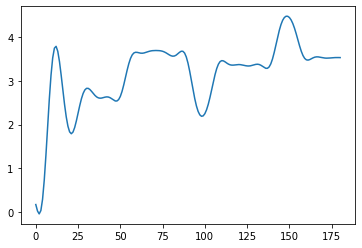

In [67]:
plt.plot(dstrainf)
dstrainf

### Differentiate actual strain twice

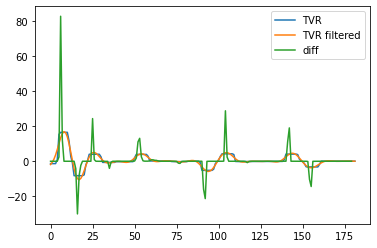

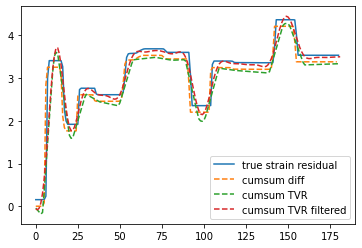

In [56]:
# Data
dt = 0.0333
dx = dt
data_noisy = dstrainf
n = len(data_noisy)

# Derivative with TVR
diff_tvr = DiffTVR(n,dx)
(ddstrain,_) = diff_tvr.get_deriv_tvr(
    data=data_noisy, 
    deriv_guess=np.full(n+1,0.0), 
    alpha=0.01,
    no_opt_steps=100
    )

b, a = signal.ellip(4, 0.01, 120, 0.125)  # LPF
ddstrainf = signal.filtfilt(b, a, ddstrain, padlen=10)

# Plot TVR derivative
fig2 = plt.figure()
plt.plot(ddstrain,label='TVR')
plt.plot(ddstrainf,label='TVR filtered')
plt.plot(np.diff(dstrain)/dt,label='diff')
plt.legend()
plt.show()

integrated_diff = np.cumsum(np.diff(dstrain))
integrated_tvr = np.cumsum(ddstrain*dt)
integrated_tvrf = np.cumsum(ddstrainf*dt)

plt.plot(dstrain,label='true strain residual')
plt.plot(integrated_diff,'--',label='cumsum diff')
plt.plot(integrated_tvr,'--',label='cumsum TVR')
plt.plot(integrated_tvrf,'--',label='cumsum TVR filtered')
plt.legend()
plt.show()

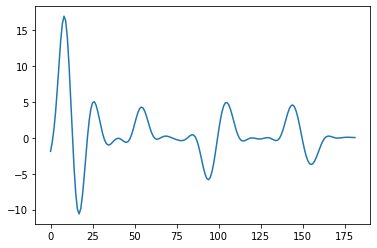

In [61]:
plt.plot(ddstrainf)

In [64]:
ddstrainf

array([-1.88382190e+00, -6.10058213e-01,  1.15160380e+00,  3.61008583e+00,
        6.72257377e+00,  1.01706727e+01,  1.34220809e+01,  1.58588532e+01,
        1.69331940e+01,  1.63069559e+01,  1.39396982e+01,  1.01058847e+01,
        5.33979745e+00,  3.24352223e-01, -4.24628564e+00, -7.79524433e+00,
       -9.95349082e+00, -1.05976802e+01, -9.83709995e+00, -7.96322386e+00,
       -5.37927589e+00, -2.52507143e+00,  1.91534269e-01,  2.44820779e+00,
        4.04060517e+00,  4.89101722e+00,  5.03534295e+00,  4.59512142e+00,
        3.74331611e+00,  2.67118664e+00,  1.56035417e+00,  5.61409695e-01,
       -2.20521659e-01, -7.32561272e-01, -9.72640817e-01, -9.80621353e-01,
       -8.24435020e-01, -5.84503775e-01, -3.39199255e-01, -1.52932289e-01,
       -6.74157842e-02, -9.61853520e-02, -2.22549081e-01, -4.01436508e-01,
       -5.65753754e-01, -6.37533135e-01, -5.43230333e-01, -2.31056833e-01,
        3.13320167e-01,  1.05726503e+00,  1.92178858e+00,  2.79372540e+00,
        3.54719497e+00,  